In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
START_NODES = 3
FINAL_NODES = 100
NODE_DEGREE = 3
STEPS = FINAL_NODES - START_NODES

### Zad.1: Model rosnącego grafu scale-free: Barab´asi-Albert (BA)

In [3]:
graph = nx.complete_graph(START_NODES)

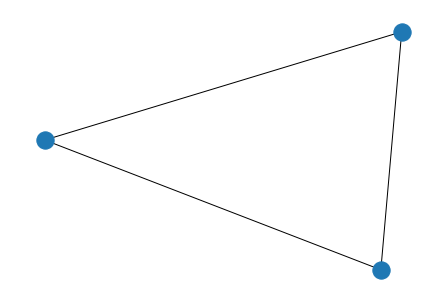

In [4]:
nx.draw(graph)

#### funkcja zwracająca najbardziej prawdopodobny node do przyłączenia

In [5]:
def select_node_to_connect(graph, edge):
    nodes_probabilities = []
    for node in list(graph.nodes())[:-1]:
        node_degree = graph.degree(node)
        node_prob = node_degree / (2*len(graph.edges())-edge)
        nodes_probabilities.append(node_prob)
    connected_node = np.random.choice(list(graph.nodes())[:-1], p=nodes_probabilities)
    # print(f"selected node to connect: {connected_node}")
    return connected_node

#### funkcja dodająca krawędź 

In [6]:
def add_edge(graph, node, edge):
    if len(graph.edges()) != 0:
        connected_node = select_node_to_connect(graph, edge) 
    else:
        connected_node = 0 
    new_edge = (connected_node, node)
    if new_edge in graph.edges():
        add_edge(graph, node, edge)
    else:
        graph.add_edge(node, connected_node)
        # print(f"Edge added between: {node + 1} {connected_node}")

#### tworzenie grafu z wykorzystaniem 2 wcześniejszych funkcji

In [7]:
def generate_graph(mo, n, m):
    graph = nx.complete_graph(mo)
    node = mo
    steps = n-mo
    for step in range(steps):
        graph.add_node(mo + step)
        for edge in range(m):
            add_edge(graph, node, edge)
        node += 1
    node_degrees = [graph.degree(node) for node in graph.nodes()]
    return graph, node_degrees

#### funkcja przedstawiająca rozkład stopni wierzchołków każdego wygenerowanego grafu w skali log-log i wyznaczająca wartość wykładnika korzystając z regresji liniowej

In [8]:
def plot(node_degrees):
    degrees, counts = np.unique(node_degrees, return_counts=True)
    plt.scatter(degrees, counts)
    degrees = np.log(degrees)
    counts = np.log(counts)
    a, b = np.polyfit(degrees, counts, 1)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel('degree')
    plt.ylabel('count')
    print(f"wartość wykładnika: {a}")

#### funkcje rysujące graf z różnymi metodami osadzania wierzchołków

In [9]:
def show_graph(graph, node_degrees):
    node_sizes = [degree*3 for degree in node_degrees]
    nx.draw(graph, node_size=node_sizes, node_color=node_degrees, width=0.5, cmap='viridis')

def show_graph_spiral(graph, node_degrees):
    node_sizes = [degree*3 for degree in node_degrees]
    nx.draw(graph, pos=nx.spiral_layout(graph), node_size=node_sizes, node_color=node_degrees, width=0.5, cmap='viridis')

def show_graph_circular(graph, node_degrees):
    node_sizes = [degree*3 for degree in node_degrees]
    nx.draw(graph, pos=nx.circular_layout(graph), node_size=node_sizes, node_color=node_degrees, width=0.5, cmap='viridis')    

#### wyrysowanie 4 grafów odpowiadających im wykresów oraz 2 wariantów z różnymi metodami osadzania wierzchołków

wartość wykładnika: -1.6046491946239507
wartość wykładnika: -2.098615432330264
wartość wykładnika: -2.3477395624526083
wartość wykładnika: -2.4477836749588566


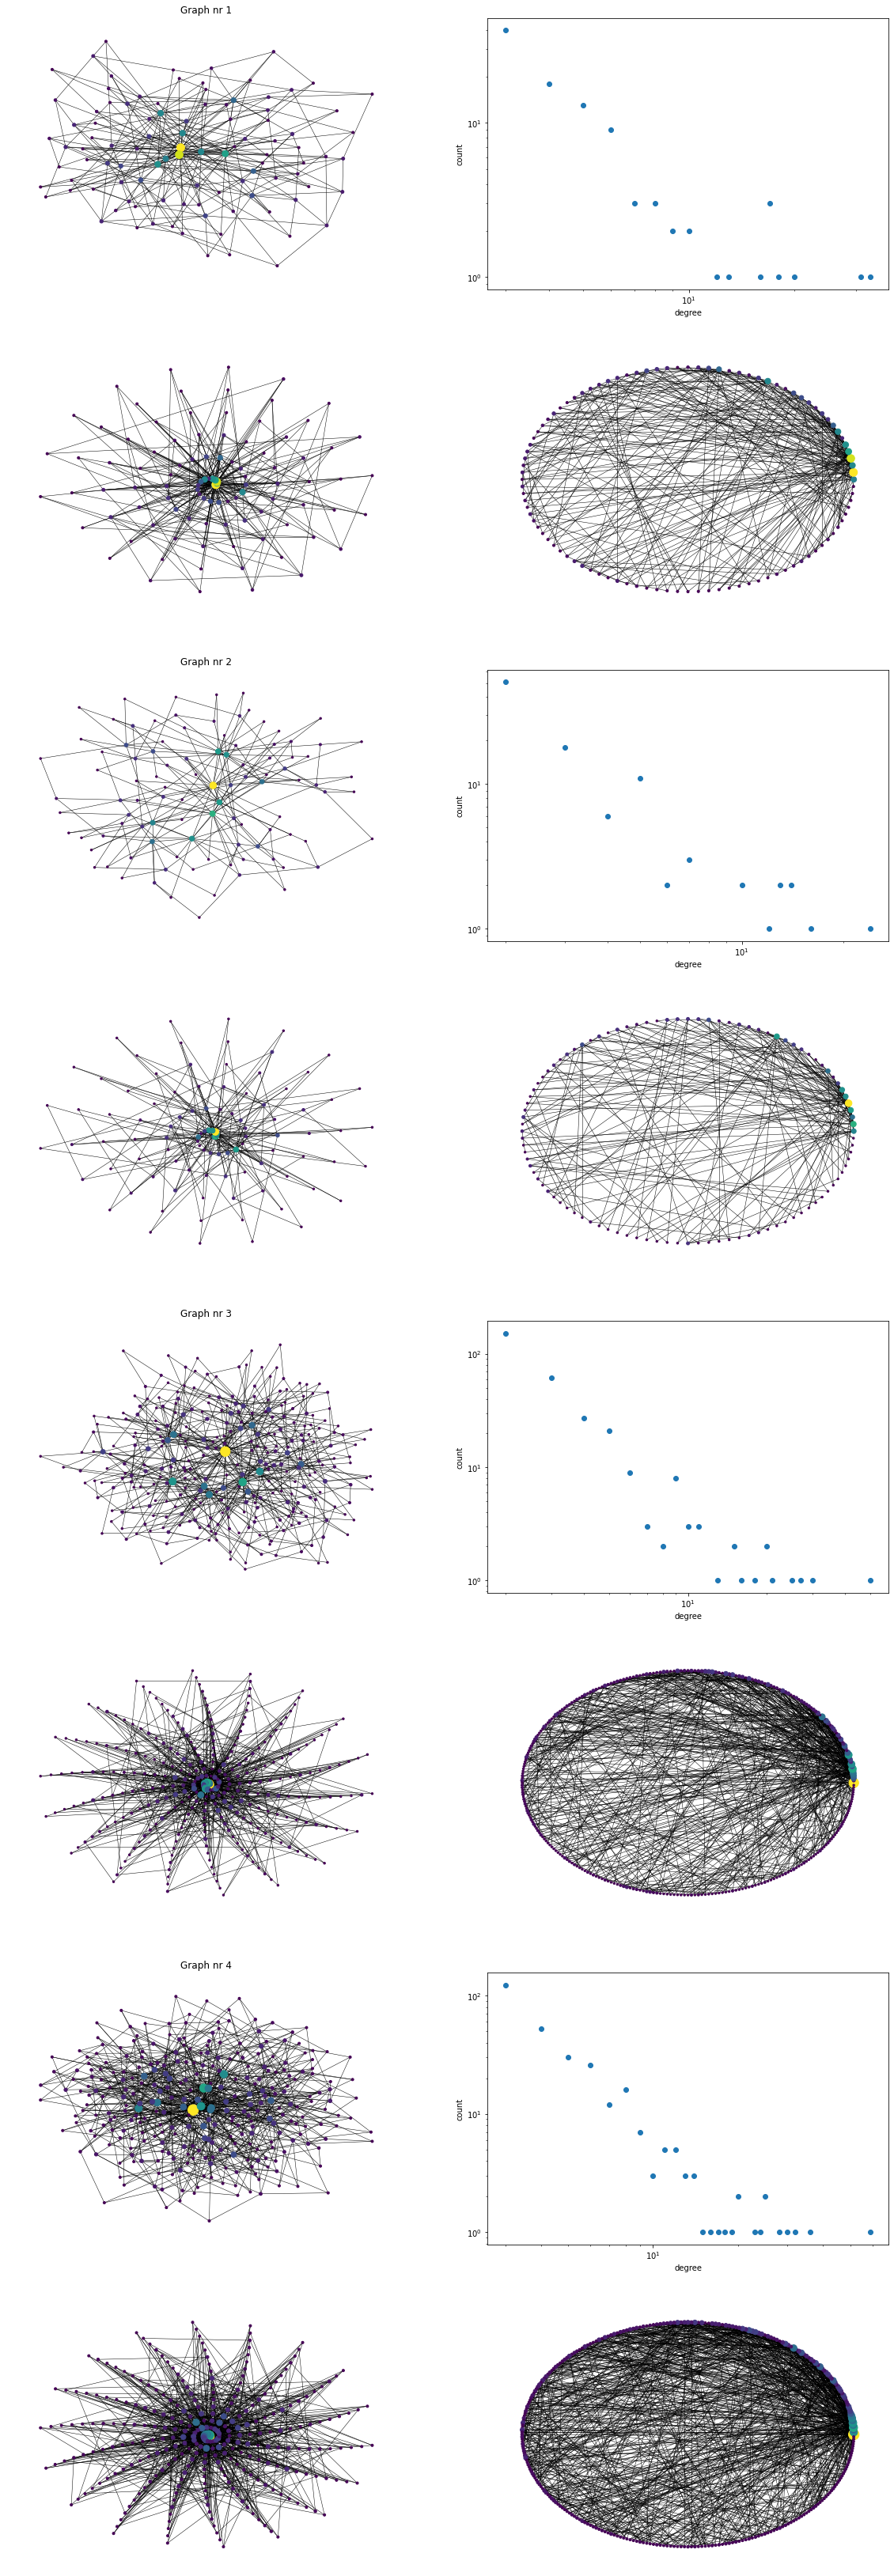

In [102]:
graph_params = [(3, 100), (2, 100), (2, 300), (3, 300)]

plt.figure(figsize=(20,120))
for i, params in enumerate(graph_params):
    m, n = params
    mo = m
    graph, node_degrees = generate_graph(mo, n, m)
    plt.subplot(16,2,4*i+1)
    show_graph(graph, node_degrees)
    plt.title(f'Graph nr {i+1}')
    plt.subplot(16,2,4*i+2)
    plot(node_degrees)
    plt.subplot(16,2,4*i+3)
    show_graph_spiral(graph, node_degrees)
    plt.subplot(16,2,4*i+4)
    show_graph_circular(graph, node_degrees)

### Zad.2:  Odporność grafu scale-free na błędy i ataki

#### funkcja zwracająca wierzchołek do usunięcia w wyniku ataku

In [57]:
def select_node_to_delete(graph):
    nodes_probabilities = []
    for node in list(graph.nodes()):
        node_degree = graph.degree(node)
        node_prob = node_degree / (2*len(graph.edges()))
        nodes_probabilities.append(node_prob)
    node_to_delete = np.random.choice(graph.nodes(), p=nodes_probabilities)
    # print(f"selected node to delete: {node_to_delete}")
    return node_to_delete

Efficiency of initial graph: 0.3739807370185482
Average shortest path length of initial graph: 2.911407035175879
Efficiency of graph after 40 random errors: 0.3351104372566228
Average shortest path length of graph after 40 random errors: 3.32562893081761
Efficiency of graph after 40 attacks: 0.28839768230520707
Average shortest path length of graph after 40 attacks: 3.959935489347254


Text(0.5, 1.0, 'Graph after 40 attacks')

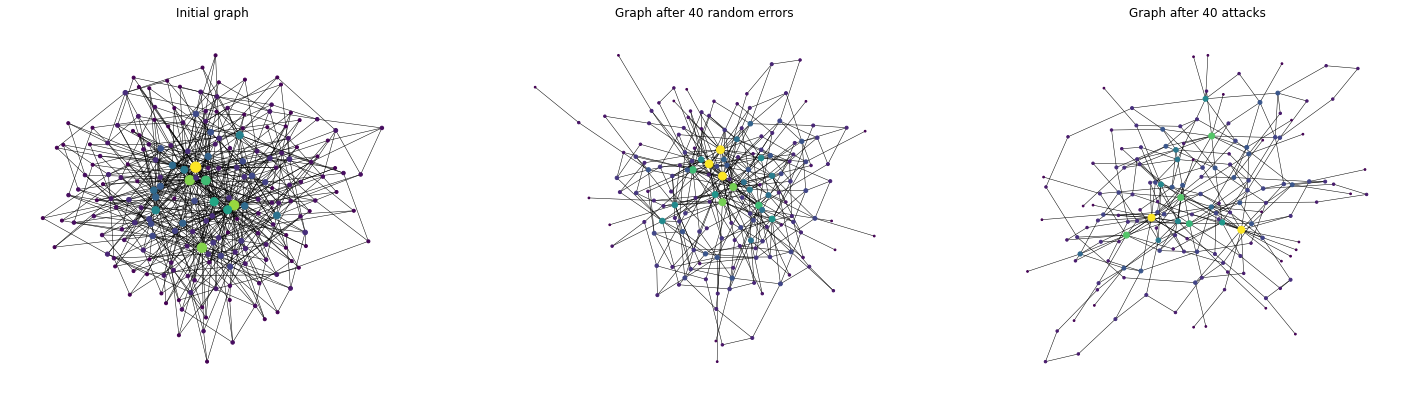

In [104]:
mo, n, m = 3, 200, 3
removals_percentage = 0.2
n_remowals = int(n*removals_percentage)

graph, node_degrees = generate_graph(mo, n, m)
graph_copy = copy.deepcopy(graph)
print(f'Efficiency of initial graph: {nx.global_efficiency(graph)}')
print(f'Average shortest path length of initial graph: {nx.average_shortest_path_length(graph)}')

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
show_graph(graph, node_degrees)
plt.title('Initial graph')

for i in range(n_remowals):
    random_node_to_delete = random.sample(graph.nodes(), k=1)
    graph.remove_node(random_node_to_delete[0])
    attacked_node_to_delete = select_node_to_delete(graph_copy)
    graph_copy.remove_node(attacked_node_to_delete)
nodes = [node for nodes in graph_copy.edges() for node in nodes]
nodes = np.unique(nodes)
not_connected_nodes = [node for node in graph_copy.nodes() if node not in nodes]
for node in not_connected_nodes:
    graph_copy.remove_node(node)

print(f'Efficiency of graph after {n_remowals} random errors: {nx.global_efficiency(graph)}')
print(f'Average shortest path length of graph after {n_remowals} random errors: {nx.average_shortest_path_length(graph)}')
node_degrees = [graph.degree(node) for node in graph.nodes()]
plt.subplot(2,3,2)
show_graph(graph, node_degrees)
plt.title(f'Graph after {n_remowals} random errors')

print(f'Efficiency of graph after {n_remowals} attacks: {nx.global_efficiency(graph_copy)}')
print(f'Average shortest path length of graph after {n_remowals} attacks: {nx.average_shortest_path_length(graph_copy)}')
node_degrees = [graph_copy.degree(node) for node in graph_copy.nodes()]
plt.subplot(2,3,3)
show_graph(graph_copy, node_degrees)
plt.title(f'Graph after {n_remowals} attacks')

Efetywność grafu spada zarówno po losowym usunięciu wierzchołka, jak i ataku. W przypadku ataku ten spadek jest znacznie większy.    
Natomiast średnia długość najkrótszej ścieżki wzrasta po losowym usunięciu wierzchołka, jak i ataku. W przypadku ataku ten wzrost jest znacznie większy.